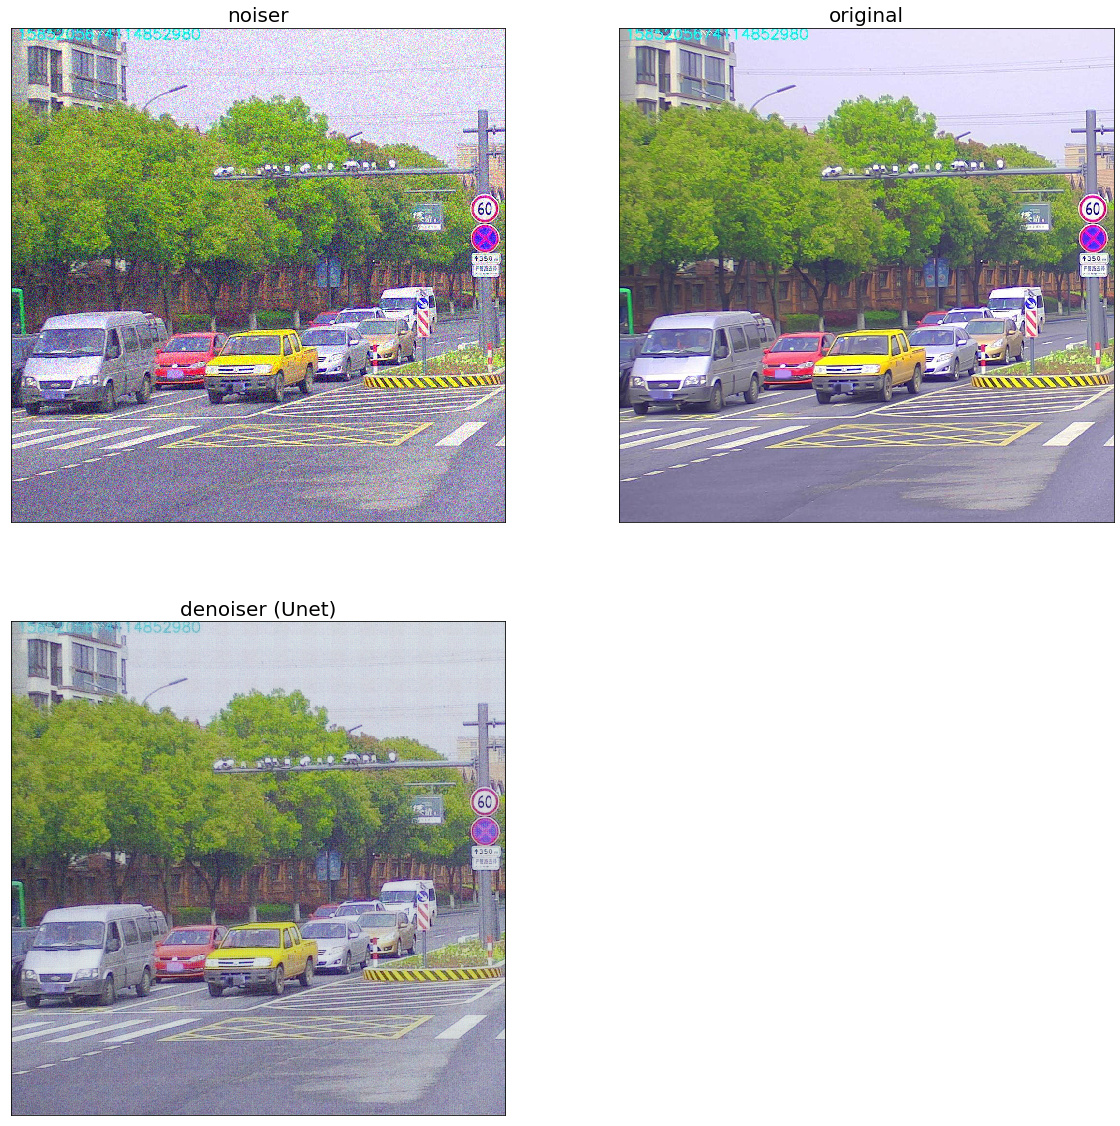

In [7]:
# from sr import *
import tensorflow as tf
import matplotlib.pyplot as plt
from sr.utils import load, noiser, random_crop, weights_file
from sr.gerador import Gerador_UNet
import os

unet = Gerador_UNet()
gan_generator = unet.generator()
gan_generator.load_weights("/opt/notebooks/weights/srgan/pre_generator.h5")
# gan_generator.load_weights(weights_file('pre_generator.h5'))

def resolve_single(model, noise):
    return resolve(model, tf.expand_dims(noise, axis=0))[0]


def resolve(model, noise_batch):
    noise_batch = tf.cast(noise_batch, tf.float32)
    denoise_batch = model(noise_batch)
    denoise_batch = tf.clip_by_value(denoise_batch, 0, 255)
    # denoise_batch = tf.round(denoise_batch)
    # denoise_batch = tf.cast(denoise_batch, tf.uint8)
    return denoise_batch


def resolve_and_plot(noise_image_path):
    image = load(noise_image_path)
    noise, original = noiser(image, std=(25)/(255))
    # noise, original = random_crop(noise, original, scale=8)
    size = 1024
    noise, original = noise[:size,:size], original[:size,:size]

    with tf.device("/GPU:0"):
      gan_sr = resolve_single(gan_generator, noise)
      
    # print(noise[0], "\n", original[0], "\n", gan_sr)
    
    plt.figure(figsize=(20, 20))
    
    images = [noise, original, gan_sr]
    titles = ['noiser', "original",  'denoiser (Unet)', "original (Unet)"]
    positions = [1, 2, 3]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, pos)
        plt.imshow(img)
        plt.title(title, fontsize=20)
        plt.xticks([])
        plt.yticks([])

# %%
origem = "/opt/notebooks/tavc/dataset/S2TLD/JPEGImages/"

files = os.listdir(origem)[100]
resolve_and_plot(origem + files)
